In [25]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10,min_samples_leaf=2,bootstrap=False)
data = [[1,3],[2,5],[3,9],[4,3],[5,2],[2,9],[4,5]]
target = [10,20,15,18,30,22,9]
# Train
model.fit(data,target)
# Extract single tree
estimator = model.estimators_[1]

In [26]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [27]:
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=100'])

0

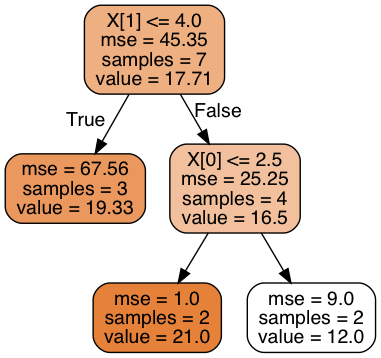

In [28]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [32]:
from RFTools import *

In [33]:
dot_data = export_graphviz(estimator, out_file = None, rounded  = True, special_characters = True)  
G = Graph(dot_data)

In [34]:
G.get_max_prediction_terminal_node()

{'3': 21.0}

In [35]:
estimator.apply(data)

array([1, 3, 4, 1, 1, 3, 4])

In [40]:
assign = estimator.apply(data)
np.array(data)[np.where(assign == 3)]

array([[2, 5],
       [2, 9]])